In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [7]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


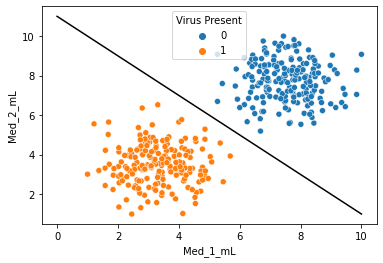

In [11]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL',data=df,hue='Virus Present')

# creating a hyperplane
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x+b

plt.plot(x,y,'black');

In [12]:
from sklearn.svm import SVC

In [13]:
X = df.drop('Virus Present',axis=1)
y = df['Virus Present']

### Linear kernel

In [14]:
model = SVC(kernel='linear', C=1000)

In [15]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [16]:
from svm_margin_plot import plot_svm_boundary

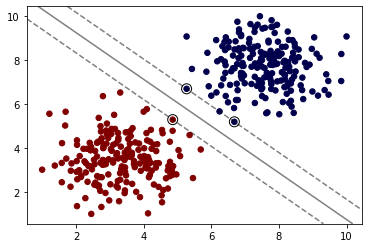

In [17]:
plot_svm_boundary(model,X,y)

In [24]:
model = SVC(kernel='linear',C=0.005)

In [25]:
model.fit(X,y)

SVC(C=0.005, kernel='linear')

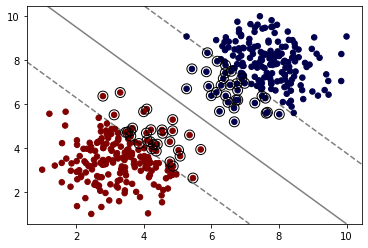

In [26]:
plot_svm_boundary(model,X,y)

### rbf kernel

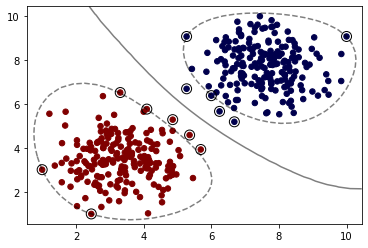

In [30]:
model = SVC(kernel='rbf',C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

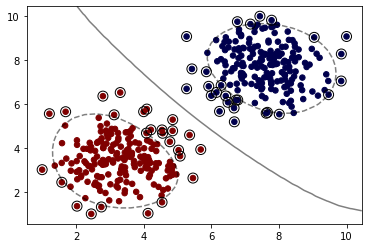

In [32]:
model = SVC(kernel='rbf',C=0.1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

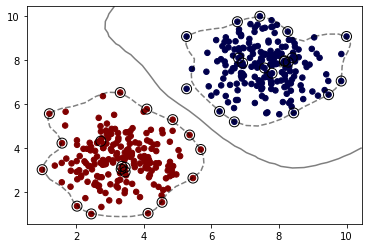

In [33]:
model = SVC(kernel='rbf',C=1,gamma='auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Sigmoid kernel

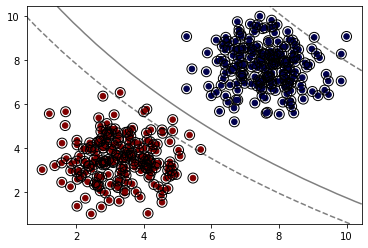

In [34]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Polynomial kernel

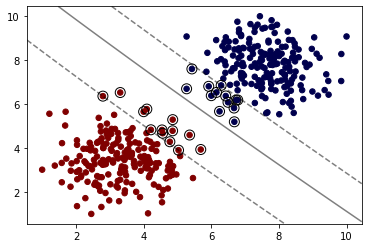

In [45]:
model = SVC(kernel='poly',degree=3,C=0.001)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### GridSearch

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
svm = SVC()

In [48]:
param_grid = {'C':[0.01,0.1,1],
             'kernel':['linear','rbf']}

In [49]:
grid = GridSearchCV(svm,param_grid)

In [50]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [51]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}